# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [5]:
df.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [6]:
# This will be a two-tailed test using ANOVA.

# First, drop rows with NaN in the AdjustedCompensation column
df_copy = df[df.AdjustedCompensation >= 0]
df_copy.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,4331.000000,4335.000000,4337.000000,4332.000000,4334.000000,4331.000000,4342.000000,4340.000000,4333.000000,4340.000000,4338.000000,4328.000000,4.342000e+03,4342.000000,4.342000e+03
mean,33.012930,23.507151,20.236077,16.581602,5.292824,1.566159,37.246891,21.251843,11.098200,14.237673,13.400645,2.188309,4.920543e+07,0.706252,6.637600e+06
std,24.520472,23.489280,19.702310,22.114341,10.244674,8.325474,20.912887,15.351946,12.051884,11.074353,12.033618,11.106701,2.146162e+09,0.484515,4.294491e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000030,0.000000e+00
25%,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,10.000000,1.000000,10.000000,5.000000,0.000000,5.000000e+04,0.077002,2.041214e+04
50%,30.000000,20.000000,20.000000,8.000000,0.000000,0.000000,40.000000,20.000000,10.000000,10.000000,10.000000,0.000000,9.999950e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,30.000000,30.000000,10.000000,0.000000,50.000000,30.000000,15.000000,20.000000,20.000000,0.000000,2.185250e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


In [7]:
df_copy.AdjustedCompensation.isna().sum()

0

In [8]:
df_copy = df_copy[(df_copy.AdjustedCompensation < 500000) & (df_copy.AdjustedCompensation > 10000)]
df_copy.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,3647.000000,3651.000000,3653.000000,3652.000000,3651.000000,3648.000000,3657.000000,3655.000000,3650.000000,3656.000000,3655.000000,3646.000000,3.657000e+03,3657.000000,3657.000000
mean,32.911982,23.136812,20.858162,16.714814,5.137250,1.426544,37.462948,20.711902,11.039452,14.076586,13.742544,2.402907,3.239632e+06,0.797494,77389.958348
std,24.497312,23.453936,19.895395,22.259262,10.085548,8.129876,20.776536,14.756806,12.055115,10.591211,12.081610,11.669866,3.702490e+07,0.445493,56516.799811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000e+03,0.000030,10119.744000
25%,15.000000,5.000000,5.000000,0.000000,0.000000,0.000000,20.000000,10.000000,1.000000,10.000000,5.000000,0.000000,5.500000e+04,0.321350,35027.150000
50%,30.000000,20.000000,20.000000,5.500000,0.000000,0.000000,40.000000,20.000000,10.000000,10.000000,10.000000,0.000000,1.000000e+05,1.000000,65000.000000
75%,50.000000,33.000000,30.000000,30.000000,5.000000,0.000000,50.000000,30.000000,15.000000,20.000000,20.000000,0.000000,2.000000e+05,1.043382,104338.200000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.194000e+09,2.652053,470000.000000


In [9]:
# Make the two datasets
masters = df_copy[df_copy.FormalEducation == 'Master\'s degree']['AdjustedCompensation']
print('Mean salary for MA:', masters.mean())
print('Number of MA:', len(masters))
bachelors = df_copy[df_copy.FormalEducation == 'Bachelor\'s degree']['AdjustedCompensation']
print('Mean salary for BA:', bachelors.mean())
print('Number of BA:', len(bachelors))

Mean salary for MA: 73831.31244109935
Number of MA: 1701
Mean salary for BA: 69071.96770152132
Number of BA: 844


*State the hypotheses*

H0: There is no difference; mean of masters = mean of bachelors.

Ha: They are statistically different; mean of masters =/= mean of bachelors.

*Set alpha and power, determine that samples are big enough*

In [10]:
# Set variables
alpha = 0.05
power = 0.8
effect_size = 0.2

# Get the population standard deviation for use in calculations
pop_stdev = df_copy.AdjustedCompensation.std()
pop_stdev

56516.7998108296

In [11]:
# Calculate the required sample size
from statsmodels.stats.power import TTestIndPower, TTestPower
power_analysis = TTestIndPower()

power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power,
                          alternative='two-sided')

393.4056989990335

The samples are big enough to detect an effect size of 0.2 with alpha = 0.05 and power = 0.8.

In [12]:
# Check whether the sample variances are the same
print(np.var(masters))
print(np.var(bachelors))

2747084836.3098016
2987203974.588808


Since variances are not the same, I'll use ANOVA. First I will transform the data into a DataFrame containing salaries and "master's" or "bachelor's" as categories in a single categorical variable.

In [13]:
BA_v_MA = df_copy.loc[:,['FormalEducation', 'AdjustedCompensation']]
BA_v_MA = BA_v_MA[(BA_v_MA.FormalEducation == 'Master\'s degree') | (BA_v_MA.FormalEducation == 'Bachelor\'s degree')]

In [14]:
# Run ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, BA_v_MA).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(FormalEducation),1.277772e+10,1.0,4.516788,0.03366
Residual,7.193991e+12,2543.0,NaN,NaN


ANOVA yields a p-value of 0.03 for a two-tailed t-test, meaning that adjusted compensation for master's degree holders and bachelor's degree holders is statistically different. Let's check this with a Welch's t-test, too.

In [15]:
from flatiron_stats import *

p_value_welch_ttest(masters, bachelors, two_sided=True)

0.036299953725268175

Although the p-value is slightly different, the result is the same: we reject the null hypothesis. The samples are  statistically different when it comes to adjusted compensation. Now let's check the actual effect size.

In [16]:
cohens_d = power_analysis.solve_power(nobs1=len(bachelors), alpha=alpha, power=power,
                          alternative='two-sided')
print('Cohen\'s d:', cohens_d)

print('Difference in salary: $' + str(round(masters.mean() - bachelors.mean(), 2)))

Cohen's d: 0.13645490918066677
Difference in salary: $4759.34


In terms of Cohen's _d_, that's a small effect size.

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

*State the hypotheses*

H0: There is no difference; mean of doctorates = mean of bachelors.

Ha: They are statistically different; mean of doctorates =/= mean of bachelors.

In [17]:
doctorates = df_copy[df_copy.FormalEducation == 'Doctoral degree']['AdjustedCompensation']
doctorates.describe()

count       887.000000
mean      93442.199904
std       63050.915028
min       10153.000000
25%       48000.000000
50%       80231.000000
75%      125000.000000
max      400000.000000
Name: AdjustedCompensation, dtype: float64

In [18]:
BA_v_PHD = df_copy.loc[:,['FormalEducation', 'AdjustedCompensation']]
BA_v_PHD = BA_v_PHD[(BA_v_PHD.FormalEducation == 'Bachelor\'s degree') | (BA_v_PHD.FormalEducation == 'Doctoral degree')]

In [19]:
# Run ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, BA_v_PHD).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(FormalEducation),2.568552e+11,1.0,73.485308,2.211864e-17
Residual,6.043420e+12,1729.0,NaN,NaN


That's a tiny p-value, meaning that there is a significant difference between salaries for people with bachelor's and doctoral degrees. Let's check the effect size.

In [20]:
cohens_d = power_analysis.solve_power(nobs1=len(bachelors), alpha=alpha, power=power,
                          alternative='two-sided')
print('Cohen\'s d:', cohens_d)

print(doctorates.mean() - masters.mean())

Cohen's d: 0.13645490918066677
19610.887462537634


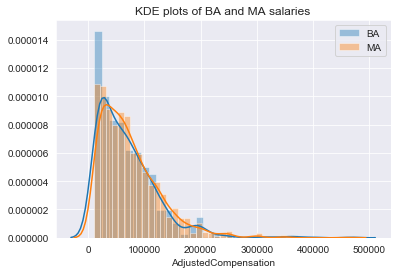

In [21]:
plt.title('KDE plots of BA and MA salaries')
sns.distplot(bachelors, label='BA')
sns.distplot(masters, label='MA')
plt.legend();


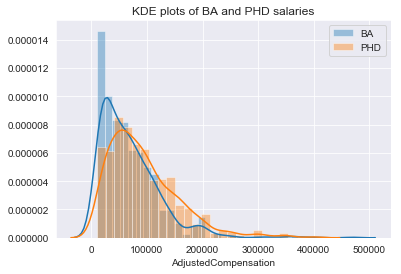

In [22]:
plt.title('KDE plots of BA and PHD salaries')
sns.distplot(bachelors, label='BA')
sns.distplot(doctorates, label='PHD')
plt.legend();

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [23]:
# Split the FormalEducation column into dummy variables
dummies = pd.get_dummies(df_copy.FormalEducation)
dummies.head()

,Bachelor's degree,Doctoral degree,I did not complete any formal education past high school,I prefer not to answer,Master's degree,Professional degree,Some college/university study without earning a bachelor's degree
3,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0
14,0,0,0,0,1,0,0
21,1,0,0,0,0,0,0


In [24]:
# Rename the columns so they're easier to reference
dummies.columns = ['BA', 'PHD', 'None', 'Other', 'MA', 'P', 'Some']
dummies.head()

,BA,PHD,None,Other,MA,P,Some
3,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0
14,0,0,0,0,1,0,0
21,1,0,0,0,0,0,0


In [25]:
# Join the dummies onto the main dataset
df_dummies = df_copy.join(dummies)
df_dummies.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation,BA,PHD,None,Other,MA,P,Some
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,1.000000,250000.0,0,0,0,0,1,0,0
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,0.802310,64184.8,1,0,0,0,0,0,0
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,0.017402,20882.4,1,0,0,0,0,0,0
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,0.033304,36634.4,0,0,0,0,1,0,0
21,Male,United States,25.0,Employed part-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,1.000000,20000.0,1,0,0,0,0,0,0


In [26]:
# Run ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(BA) + C(MA) + C(PHD)'
lm = ols(formula, df_dummies).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(BA),1.753223e+09,1.0,0.563616,4.528554e-01
C(MA),5.200839e+08,1.0,0.167193,6.826422e-01
C(PHD),8.088111e+10,1.0,26.001171,3.585407e-07
Residual,1.136328e+13,3653.0,NaN,NaN


Of the three education levels considered, only doctoral degrees have a significant effect on salary.

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!